In [31]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### MELD Data Analysis

In [7]:
import pandas as pd

In [6]:
# Read CSVs
train_data = pd.read_csv('../data/MELD/train_utterances.csv')
val_data = pd.read_csv('../data/MELD/val_utterances.csv')
test_data = pd.read_csv('../data/MELD/test_utterances.csv')

In [16]:
# Create a dictionary to store the counts
data_counts = {
    "Split": ["Train", "Valid", "Test"],
    "no. of Dialogues": [train_data['Dialogue_ID'].nunique(), val_data['Dialogue_ID'].nunique(), test_data['Dialogue_ID'].nunique()],
    "no. of Utterances": [train_data.shape[0], val_data.shape[0], test_data.shape[0]]
}
# Count avg no of utterances per dialogue
data_counts['avg no. of Utterances per Dialogue'] = [data_counts['no. of Utterances'][0]/data_counts['no. of Dialogues'][0], data_counts['no. of Utterances'][1]/data_counts['no. of Dialogues'][1], data_counts['no. of Utterances'][2]/data_counts['no. of Dialogues'][2]]

# Add Average Dialogue length
data_counts['avg Dialogue Length'] = [train_data.groupby('Dialogue_ID')['Utterance'].apply(lambda x: ' '.join(x)).str.split().apply(len).mean(), val_data.groupby('Dialogue_ID')['Utterance'].apply(lambda x: ' '.join(x)).str.split().apply(len).mean(), test_data.groupby('Dialogue_ID')['Utterance'].apply(lambda x: ' '.join(x)).str.split().apply(len).mean()]

# Add Average utterance length
data_counts['avg Utterance Length'] = [train_data['Utterance'].str.split().apply(len).mean(), val_data['Utterance'].str.split().apply(len).mean(), test_data['Utterance'].str.split().apply(len).mean()]

# Count unique words
data_counts['no. of Unique Words'] = [train_data['Utterance'].str.split().apply(set).apply(len).sum(), val_data['Utterance'].str.split().apply(set).apply(len).sum(), test_data['Utterance'].str.split().apply(set).apply(len).sum()]

# Count unique speakers
data_counts['no. of Unique Speakers'] = [train_data['Speaker'].nunique(), val_data['Speaker'].nunique(), test_data['Speaker'].nunique()]

# Count unique emotions
data_counts['no. of Unique Emotions'] = [train_data['Emotion'].nunique(), val_data['Emotion'].nunique(), test_data['Emotion'].nunique()]

# Count unique sentiments
data_counts['no. of Unique Sentiments'] = [train_data['Sentiment'].nunique(), val_data['Sentiment'].nunique(), test_data['Sentiment'].nunique()]

# Create a DataFrame from the dictionary
counts_df = pd.DataFrame(data_counts)

# Display the table
counts_df



,Split,no. of Dialogues,no. of Utterances,avg no. of Utterances per Dialogue,avg Dialogue Length,avg Utterance Length,no. of Unique Words,no. of Unique Speakers,no. of Unique Emotions,no. of Unique Sentiments
0,Train,1038,9989,9.623314,76.501927,7.949645,75712,260,7,3
1,Valid,114,1109,9.728070,76.973684,7.912534,8352,47,7,3
2,Test,280,2610,9.321429,76.553571,8.212644,20412,100,7,3


#### Train

In [11]:
# Read CSV
train_data = pd.read_csv('../data/MELD/train_utterances.csv')

# print columns names
print(train_data.columns)

# print shape
print(train_data.shape)

Index(['Dialogue_ID', 'Emotion', 'EndTime', 'Episode', 'Season', 'Sentiment',
       'Speaker', 'SrNo', 'StartTime', 'Utterance', 'Utterance_ID'],
      dtype='object')
(9989, 11)


In [12]:
# print first 5 rows
print(train_data.head())

   Dialogue_ID   Emotion       EndTime  Episode  Season Sentiment  \
0            0   neutral  00:16:21,731       21       8   neutral   
1            0   neutral  00:16:23,442       21       8   neutral   
2            0      fear  00:17:04,858       21       8  negative   
3            0   neutral  00:17:13,324       21       8   neutral   
4            0  surprise  00:17:16,536       21       8  positive   

           Speaker  SrNo     StartTime  \
0         Chandler     1  00:16:16,059   
1  The Interviewer     2  00:16:21,940   
2         Chandler    11  00:17:02,856   
3  The Interviewer    12  00:17:05,025   
4         Chandler    13  00:17:13,491   

                                           Utterance  Utterance_ID  
0  also I was the point person on my company’s tr...             0  
1                   You must’ve had your hands full.             1  
2                             No don’t I beg of you!            10  
3  All right then, we’ll have a definite answer f...    

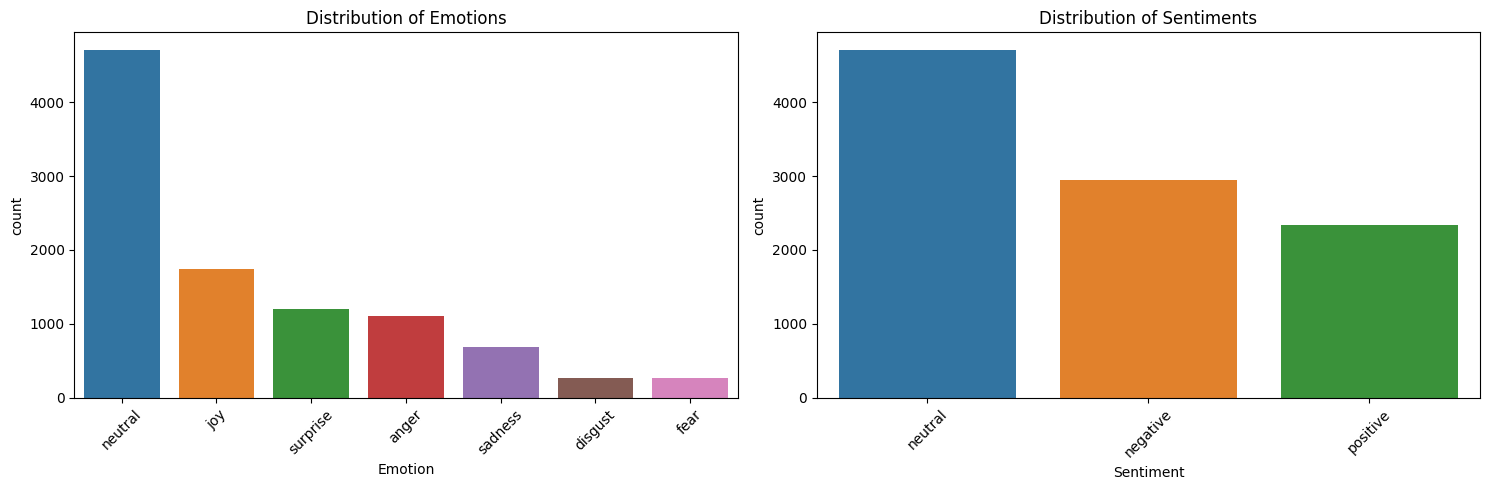

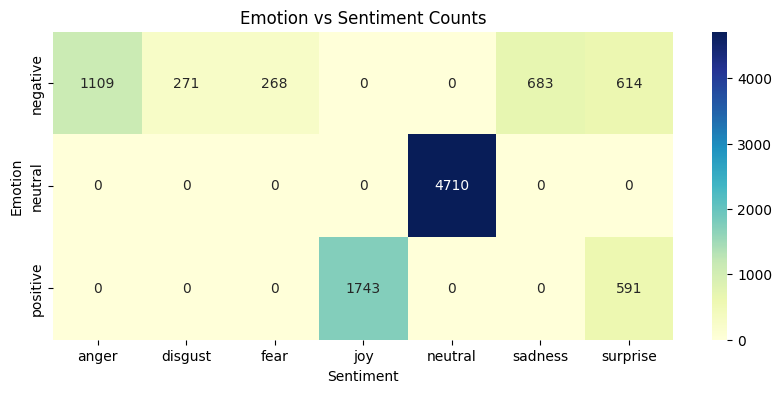

In [13]:
# Plotting the distribution of the labels
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting the distribution of the labels
plt.figure(figsize=(15, 5))

# First subplot - Distribution of Emotions
plt.subplot(1, 2, 1)
sns.countplot(x='Emotion', data=train_data, order=train_data['Emotion'].value_counts().index)
plt.title('Distribution of Emotions')
plt.xticks(rotation=45)

# Second subplot - Distribution of Sentiments
plt.subplot(1, 2, 2)
sns.countplot(x='Sentiment', data=train_data, order=train_data['Sentiment'].value_counts().index)
plt.title('Distribution of Sentiments')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


# Create a pivot table [Mapping between Emotion and Sentiment]
pivot_table = train_data.pivot_table(index='Sentiment', columns='Emotion', aggfunc='size', fill_value=0)


# Plotting the confusion matrix-like heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Emotion vs Sentiment Counts')
plt.ylabel('Emotion')
plt.xlabel('Sentiment')
plt.show()

In [33]:
from EDA_utils import *
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Text Analysis

In [36]:
get_non_alpha_numeric_tokens(train_data['Utterance'])

{'!',
 '$',
 '%',
 '&',
 "'",
 "''",
 "'bout",
 "'cause",
 "'cha",
 "'co-dependent",
 "'cookie",
 "'d",
 "'em",
 "'euphoria",
 "'excuse",
 "'hey",
 "'hhiii",
 "'it",
 "'ll",
 "'m",
 "'man",
 "'maybe",
 "'me",
 "'memo-",
 "'mistress",
 "'my",
 "'n",
 "'ohh",
 "'pl",
 "'poor",
 "'pretty",
 "'re",
 "'s",
 "'scuse",
 "'self-destructive",
 "'ve",
 "'were",
 "'wh-whoa",
 "'yes",
 "'you",
 '(',
 '*',
 ',',
 '-',
 '--',
 '-hey',
 '-leg',
 '-ow',
 '-she',
 '.',
 '..',
 '...',
 '....',
 '.....',
 '......',
 '.......',
 '........',
 '1,000',
 '1,500',
 '11-b',
 '16,000',
 '16-hour',
 '1…2…3—go',
 '2,000',
 '2:17',
 '3:30',
 '4-6',
 '4:00',
 '5,000',
 '555-9323',
 '5:30',
 '6-year-old',
 '6:00',
 '7.50',
 '80-foot',
 '8:00',
 '8:00.',
 '8:30',
 '9-1-1',
 '90/10',
 '92.3',
 ':',
 ';',
 '?',
 '[',
 ']',
 '``',
 'a-a',
 'a-doin',
 'a-five',
 'a-gogo',
 'a-ha',
 'a-live',
 'a.m',
 'about-about',
 'about……there',
 'actually…',
 'ad-libbing',
 'after—i',
 'again—nooooooo',
 'ah-',
 'ah-ah',
 'ah-ah-ah',

##### Word Freq Analysis

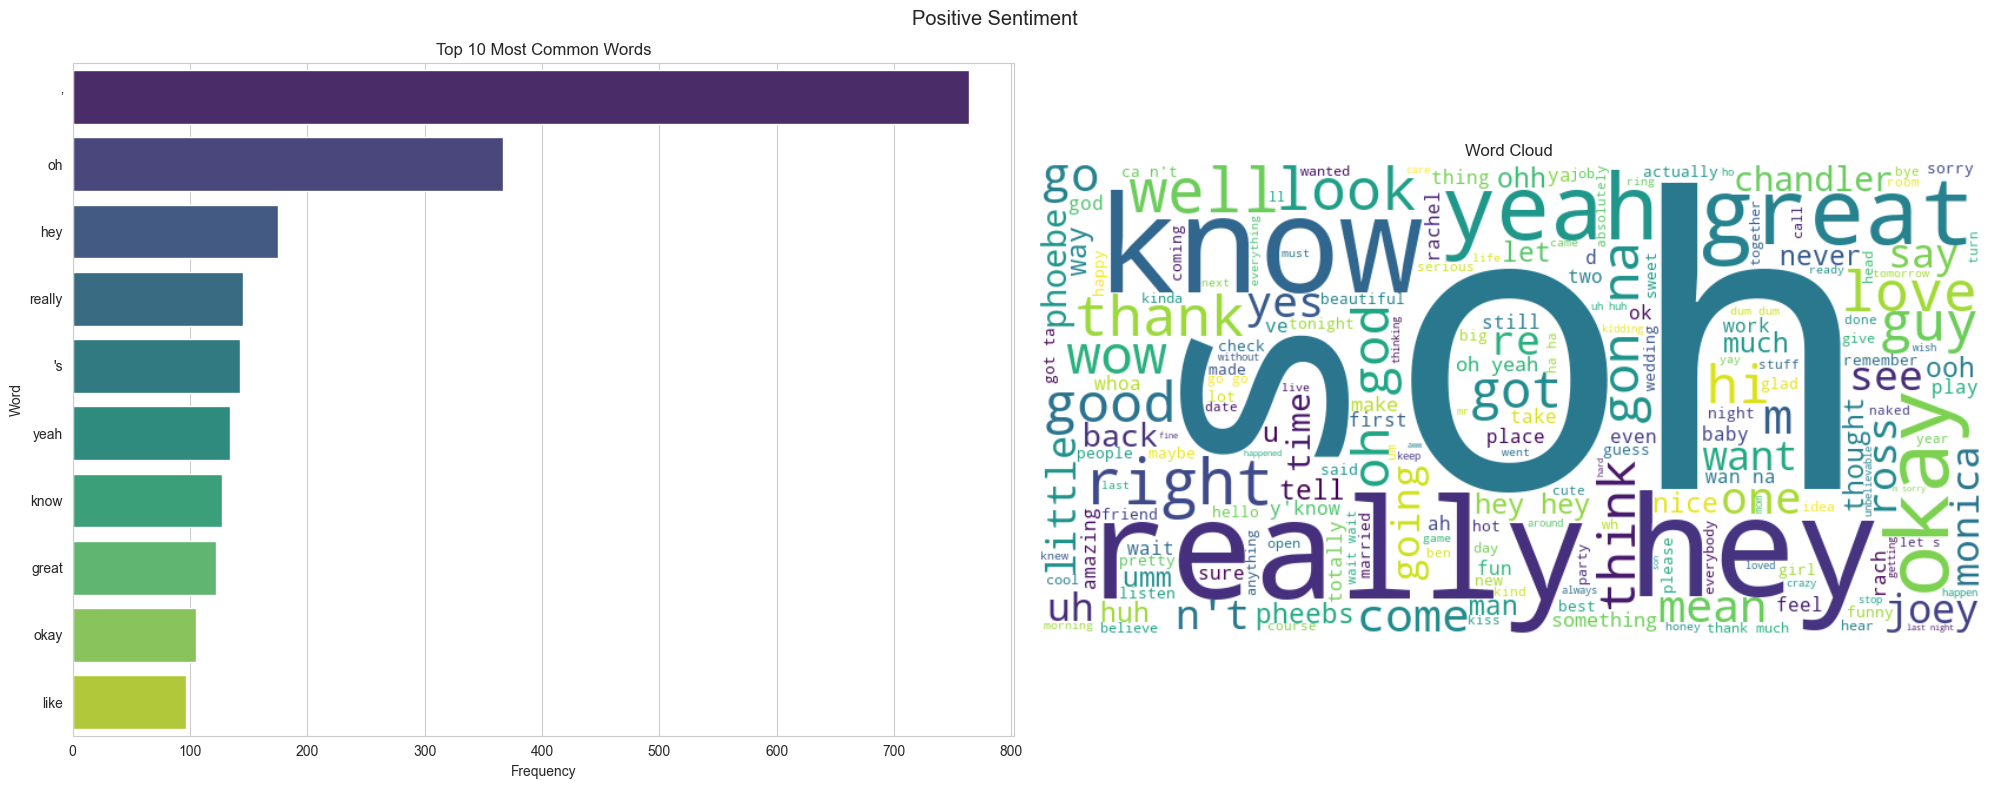

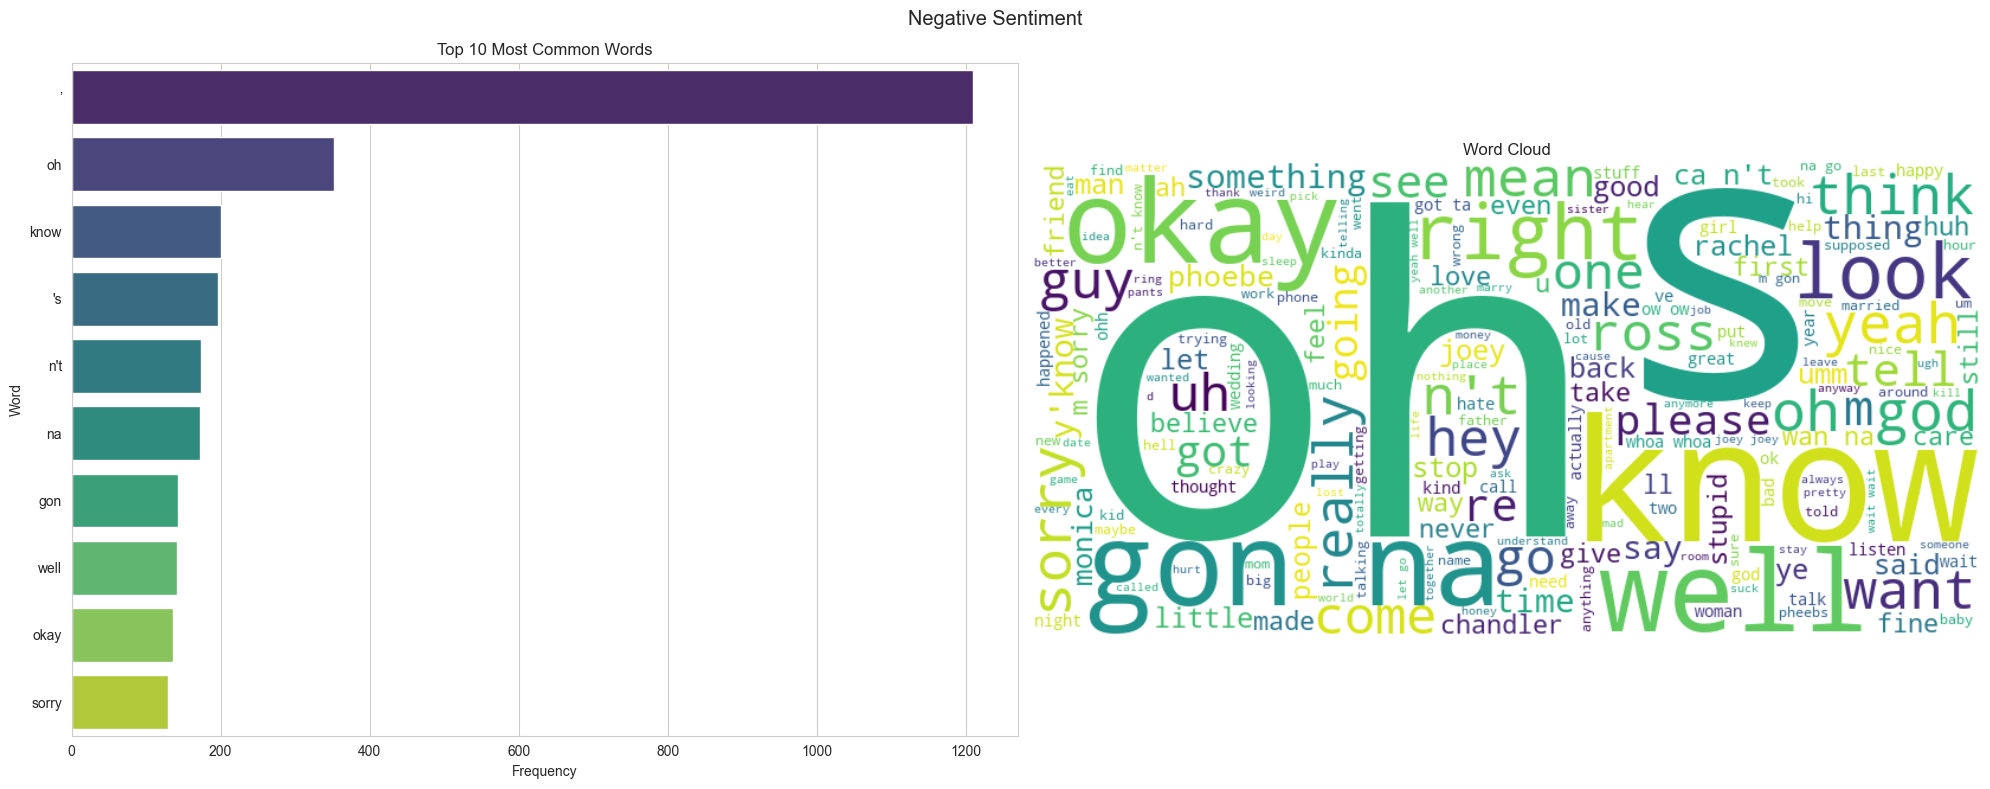

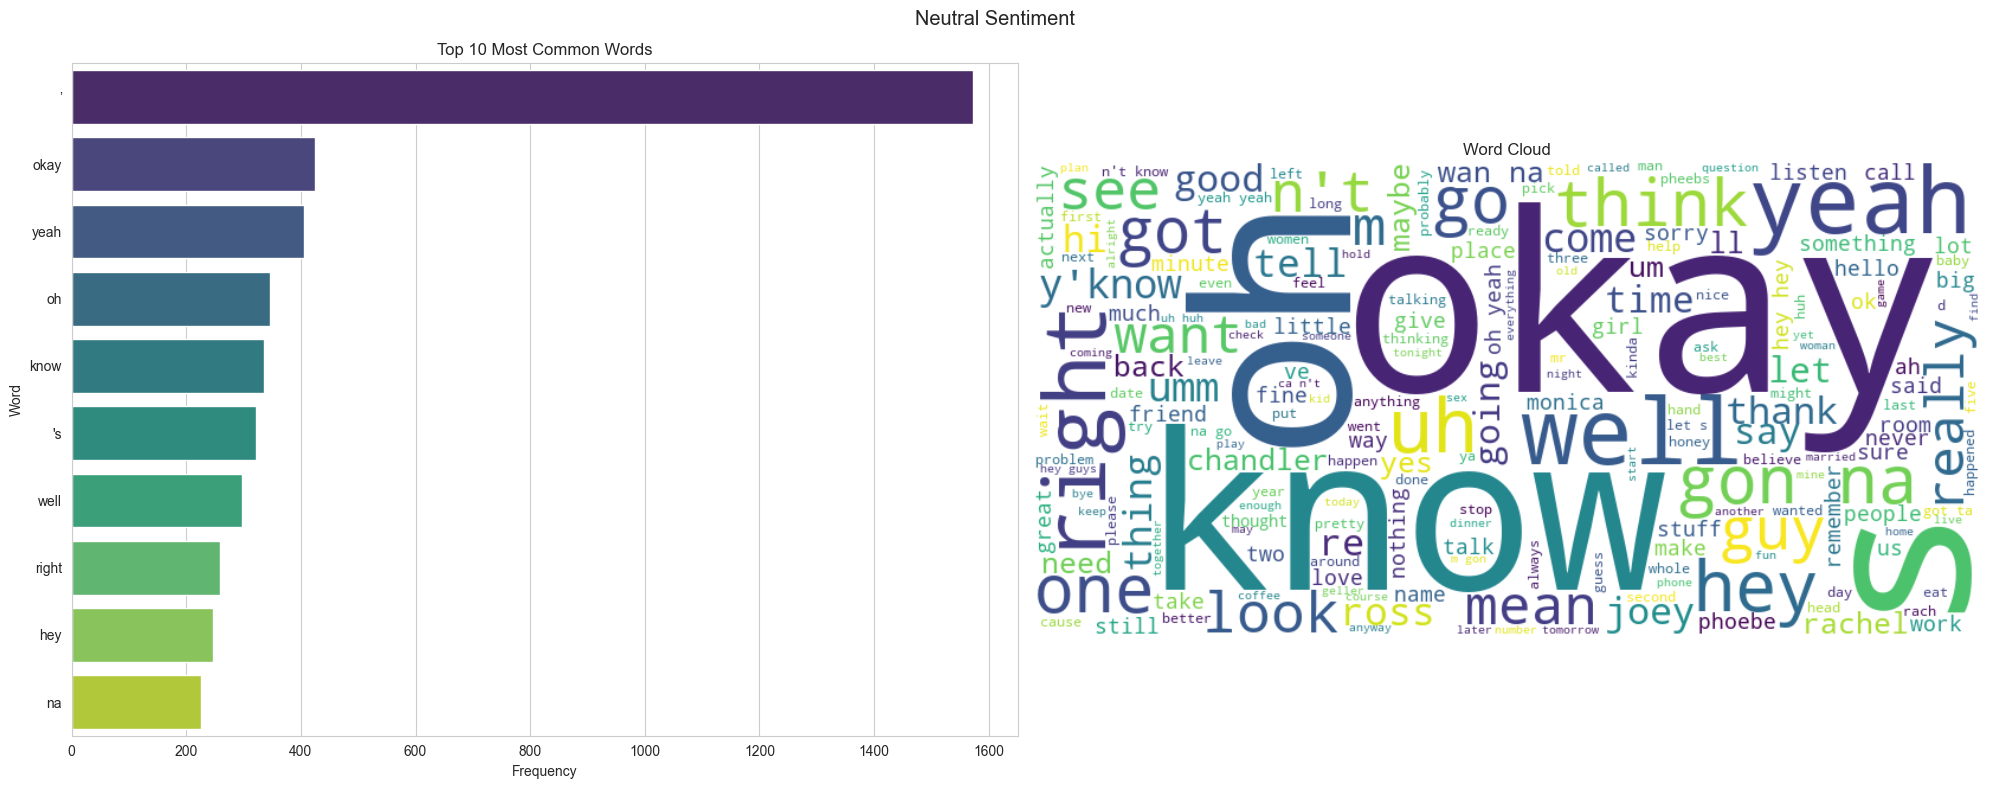

In [28]:
# Positive Sentiment
word_freq_analysis(train_data[train_data['Sentiment'] == 'positive']["Utterance"],plot_title="Positive Sentiment")

# Negative Sentiment
word_freq_analysis(train_data[train_data['Sentiment'] == 'negative']["Utterance"],plot_title="Negative Sentiment")

# Neutral Sentiment
word_freq_analysis(train_data[train_data['Sentiment'] == 'neutral']["Utterance"],plot_title="Neutral Sentiment")


##### TF-IDF Analysis

##### N-gram Analysis

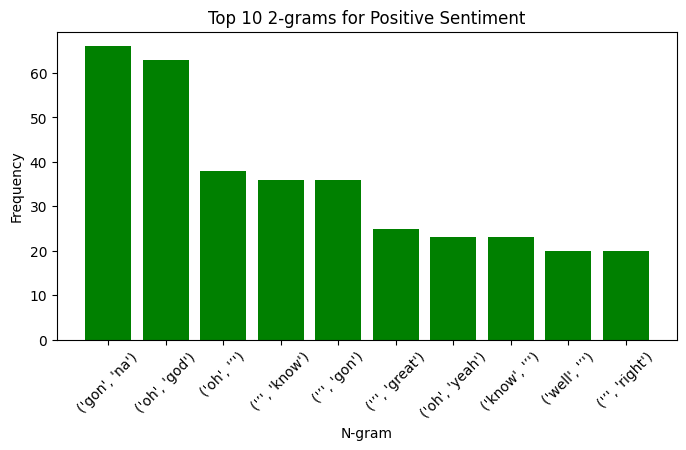

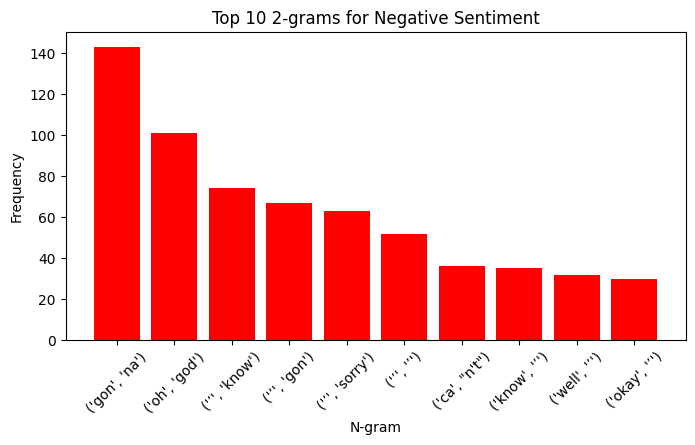

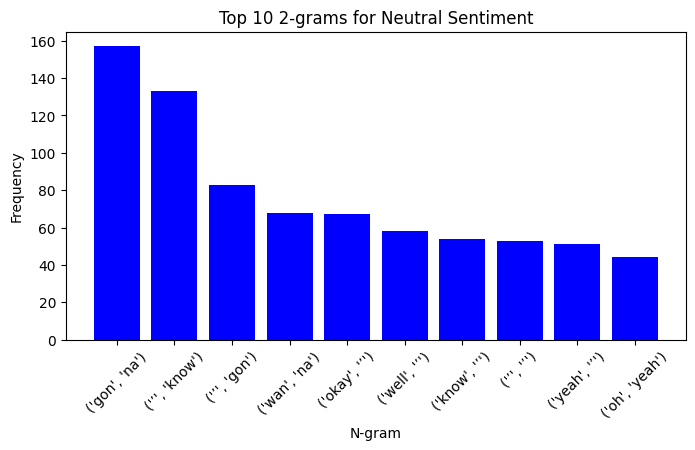

In [25]:
# 2-gram analysis
_=n_gram_analysis(train_data[train_data['Sentiment'] == 'positive']["Utterance"],n=2,plot_title="Positive Sentiment",color='green')
_=n_gram_analysis(train_data[train_data['Sentiment'] == 'negative']["Utterance"],n=2,plot_title="Negative Sentiment",color='red')
_=n_gram_analysis(train_data[train_data['Sentiment'] == 'neutral']["Utterance"],n=2,plot_title="Neutral Sentiment",color='blue')



##### Lexical Diversity Analysis

In [27]:
pos_lexical_diversity = lexical_diversity(data=train_data[train_data['Sentiment'] == 'positive']["Utterance"])
neg_lexical_diversity = lexical_diversity(data=train_data[train_data['Sentiment'] == 'negative']["Utterance"])
neu_lexical_diversity = lexical_diversity(data=train_data[train_data['Sentiment'] == 'neutral']["Utterance"])

# Show in a table
lexical_diversity_df = pd.DataFrame({
    "Sentiment": ["Positive", "Negative", "Neutral"],
    "Lexical Diversity": [pos_lexical_diversity, neg_lexical_diversity, neu_lexical_diversity]
})
lexical_diversity_df

,Sentiment,Lexical Diversity
0,Positive,0.222277
1,Negative,0.196325
2,Neutral,0.184883
